<a href="https://colab.research.google.com/github/MansiKaushik123/Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail Sales Prediction



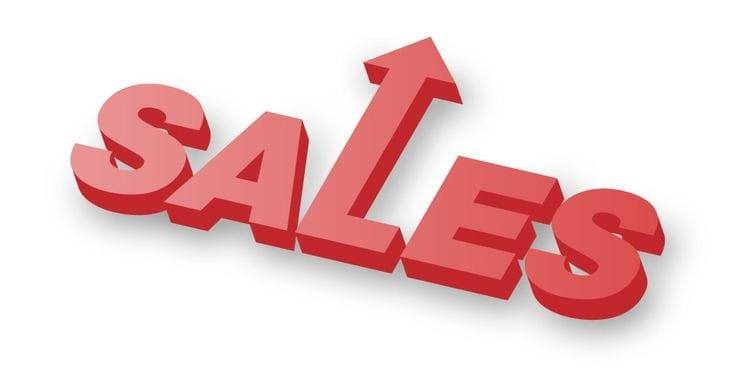

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** - Mansi Kaushik


# **Project Summary -**

Write the summary here within 500-600 words.

This dataset represents real-time data from Roseman Stores. Upon studying the problem, we noticed that it's a regression problem where our main objective is to predict sales for Roseman.

In this document, we explore the dataset using Exploratory Data Analysis. We also use Exponential Moving Averages to identify trends and seasonality within the Roseman dataset.

**We conduct regression analysis using several prediction methods:**

A. Linear Regression Analysis

B. Elastic Regression (Lasso and Ridge Regression)

C. Random Forest Regression

D. Adaboost and XGBoost


By implementing these algorithms, we were able to achieve an accuracy of 98% using XGBoost.

# **GitHub Link -**

Provide your GitHub Link here.

https://github.com/MansiKaushik123/Retail_Sales_Prediction

# **Problem Statement**


**Write Problem Statement Here.**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **Data Overview**


**Rossmann Srores Data.csv---Historical data including Revenue**

**store.csv - supplemental information about the store**

*Data fields Most of the fields are self-explanatory. The following are clarifications for those that aren't.*

**Id** - an identifier that represents a (Store, Date) pair within the test set.

**store**-- a distinct Identifier for each store.

**Sales** - the revenue for any given day (this is what you are forecasting)

**Customers** - the count of customers on a given day.

**Open** - Open - an indicator for whether the store was open: 0 = closed, 1 = open StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**SchoolHoliday**- signifies if the (Store, Date) was impacted by the closure of public schools

**StoreType** - distinguishes between 4 different store models: a, b, c, d

**Assortment** - characterizes an assortment level: a = basic, b = extra, c = extended

**CompetitionDistance** - distance in meters to the nearest competitor store

**CompetitionOpenSince[Month/Year]** - provides the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promotion on that day

**Promo2** - Promo2 is an ongoing and successive promotion for some stores: 0 = store is not involved, 1 = store is involved

**Promo2Since[Year/Week]** - specifies the year and calendar week when the store commenced participating in Promo2

**PromoInterval** - outlines the successive intervals Promo2 is initiated, listing the months the promotion begins again. For example, "Feb,May,Aug,Nov" means each cycle starts in February, May, August, November of any given year for that store.






# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import plotly.express as px
import pandas as pd
import ast
import math
import random
from scipy.stats import skew
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle

### Dataset Loading

In [ ]:
Dataset : - Rossmann Dataset - https://drive.google.com/file/d/1RLUf6NEpRg6sefWqt-nyqLDyMEHryxrl/view?usp=share_link

Store Dataset :-https://drive.google.com/file/d/1Tu5r9A1Izhf0JabF473mmyj3jGW-RqnB/view?usp=sharing

In [ ]:
# Load Dataset
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Rosmann Data
path = '/content/Rossmann Stores Data (1).csv'

sales_df = pd.read_csv(path)

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.


In [ ]:
# Store data
path = '/content/store (1).csv'

store_df = pd.read_csv(path)


### Dataset First View

In [ ]:
# Dataset First Look
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
sales_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [ ]:
sales_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#Modify the state holiday values for a, b, and c to be all set to 1.
sales_df['StateHoliday'].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
#convert datatype object into date format .
sales_df['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [ ]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [ ]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


# **Data Wrangling**

#### Missing Values/Null Values

In [ ]:
#distance, measured in meters, to the closest competitor store.
sales_df['SchoolHoliday'] .unique()

array([1, 0])

In [ ]:
store_df.isnull().sum()


Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
di = ["DayOfWeek" , "StateHoliday" , "SchoolHoliday"]
for i in di:
  print(i)
  print(sales_df[i].unique())
  print("-----------------------")

DayOfWeek
[5 4 3 2 1 7 6]
-----------------------
StateHoliday
['0' 'a' 'b' 'c' 0]
-----------------------
SchoolHoliday
[1 0]
-----------------------


In [ ]:
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [ ]:
#Store the dataset by replacing any null values with 0.
store_df['CompetitionDistance'] = store_df['CompetitionDistance'].fillna(0)
store_df['CompetitionOpenSinceMonth'] = store_df['CompetitionOpenSinceMonth'].fillna(0)
store_df['CompetitionOpenSinceYear'] = store_df['CompetitionOpenSinceYear'].fillna(0)
store_df['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_df['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_df['PromoInterval'] = store_df['PromoInterval'].fillna(0)

In [ ]:
store_df.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [ ]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1113,1114,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
end1 = pd.merge(sales_df, store_df, on='Store',how='left')

In [ ]:
end1

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
#Convert data types from object to integer.
end1.loc[end1['StateHoliday'] == '0', 'StateHoliday'] = 0
end1.loc[end1['StateHoliday'] == 'a', 'StateHoliday'] = 1
end1.loc[end1['StateHoliday'] == 'b', 'StateHoliday'] = 2
end1.loc[end1['StateHoliday'] == 'c', 'StateHoliday'] = 3
#Save the data using the identical column name, specifically "State Holiday," by utilizing the astype function.
end1['StateHoliday'] = end1['StateHoliday'].astype(int, copy=False)

In [ ]:
#Convert data types from object to integer.
end1.loc[end1['Assortment'] == 'a', 'Assortment'] = 0
end1.loc[end1['Assortment'] == 'b', 'Assortment'] = 1
end1.loc[end1['Assortment'] == 'c', 'Assortment'] = 2
#Save the data using the identical column name, specifically "Assortment," by utilizing the astype function.
end1['Assortment'] = end1['Assortment'].astype(int, copy=False)


In [ ]:
#Convert data types from object to integer.
end1.loc[end1['StoreType'] == 'a', 'StoreType'] = 0
end1.loc[end1['StoreType'] == 'b', 'StoreType'] = 1
end1.loc[end1['StoreType'] == 'c', 'StoreType'] = 2
end1.loc[end1['StoreType'] == 'd', 'StoreType'] = 3
#Save the data using the identical column name, specifically "StoreType," by utilizing the astype function.
end1['StoreType'] = end1['StoreType'].astype(int, copy=False)

In [ ]:
print(end1[['StateHoliday','Assortment','StoreType']].nunique())

StateHoliday    4
Assortment      3
StoreType       4
dtype: int64


In [ ]:
end1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  int64  
 10  Assortment                 1017209 non-null  int64  
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [ ]:
end1['Sales'].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

In [ ]:
#Script for converting date format from object to datetime
end1['Date'] = pd.to_datetime(end1['Date'], format= '%Y-%m-%d')

In [ ]:
#code for converting an object into a date format
end1['CompetitionOpenSinceMonth'] = pd.DatetimeIndex(end1['Date']).month


In [ ]:
#code for converting an float into integer.
end1['CompetitionOpenSinceYear']= end1['CompetitionOpenSinceYear'].astype(int)
end1['Promo2SinceYear']= end1['Promo2SinceYear'].astype(int)

In [ ]:
#code for converting an float into integer.
end1['CompetitionDistance']= end1['CompetitionDistance'].astype(int)
end1['Promo2SinceWeek']= end1['Promo2SinceWeek'].astype(int)


In [ ]:
end1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  int64         
 10  Assortment                 1017209 non-null  int64         
 11  CompetitionDistance        1017209 no

## ***2. Understanding Your Variables***

In [ ]:
end1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0


In [ ]:
end1.describe().apply(lambda x: round(x, 2))


,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,5.85,1370.17,0.5,11.65,1007.01
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,3.33,935.36,0.5,15.32,1005.88
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.0,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,3.00,0.00,0.0,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,6.00,2006.00,1.0,1.00,2009.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,8.00,2011.00,1.0,22.00,2012.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1.**Line Chart**

Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

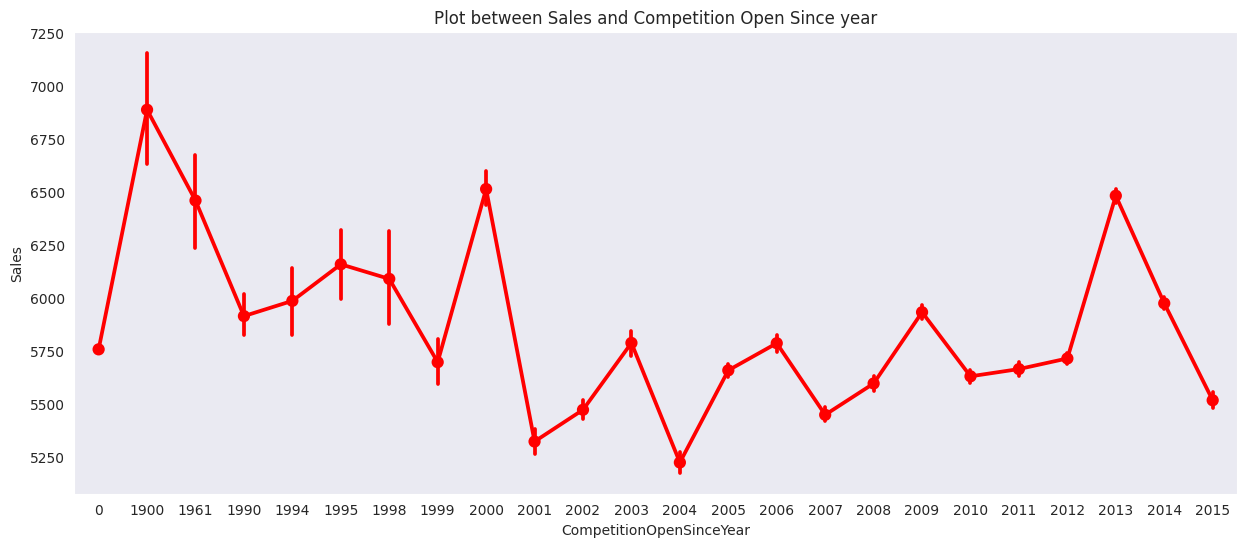

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=end1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

**From this graph, we can see that sales were at their peak in the year 1900 because there were only a few stores at that time, resulting in very little competition. However, as the years went by, the number of stores increased, leading to a rise in competition, which caused sales to decrease annually.**

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

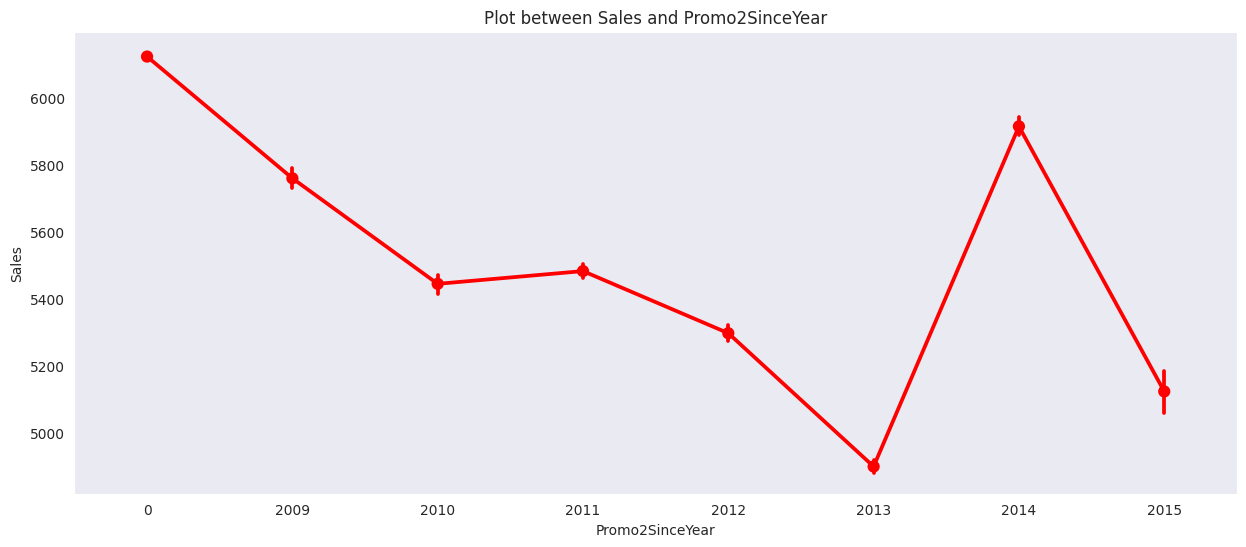

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x='Promo2SinceYear',y='Sales',data=end1,color='red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


**"Looking at this chart, we noticed that store sales change when they do promotions. The sales were not good in 2013 and 2015, even though there were promotions. One possible reason could be increasing competition each year."**

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

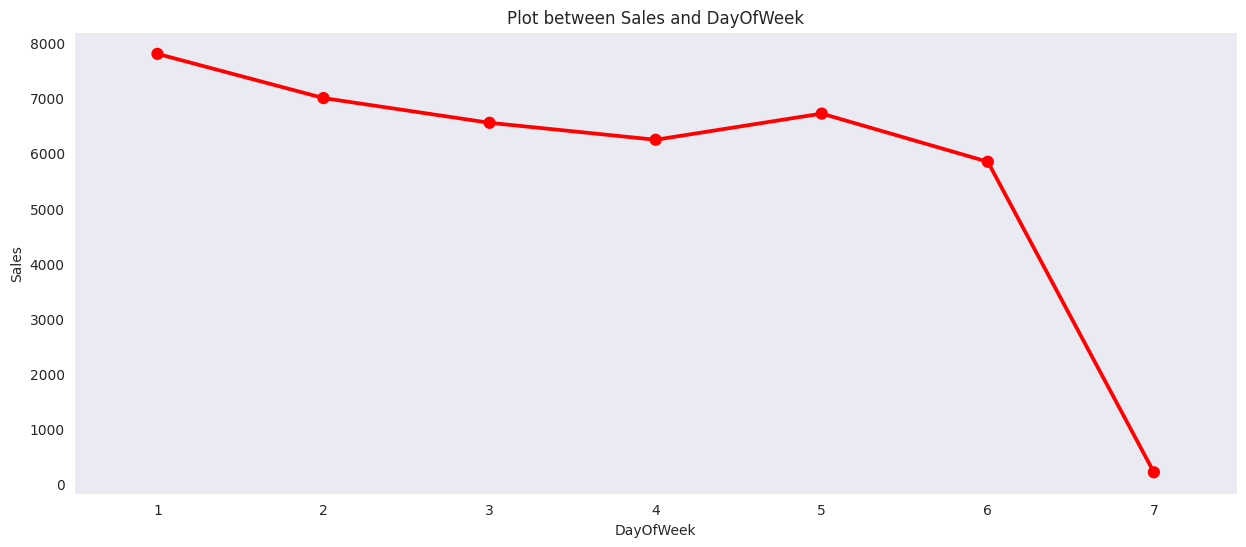

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=end1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

**"By looking at this graph, we can see that the highest sales occur on Day 1, which is Monday, and then they gradually decrease until Day 6, which is Saturday. Since many stores are not open on Day 7, which is Sunday, the sales are almost zero."**

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

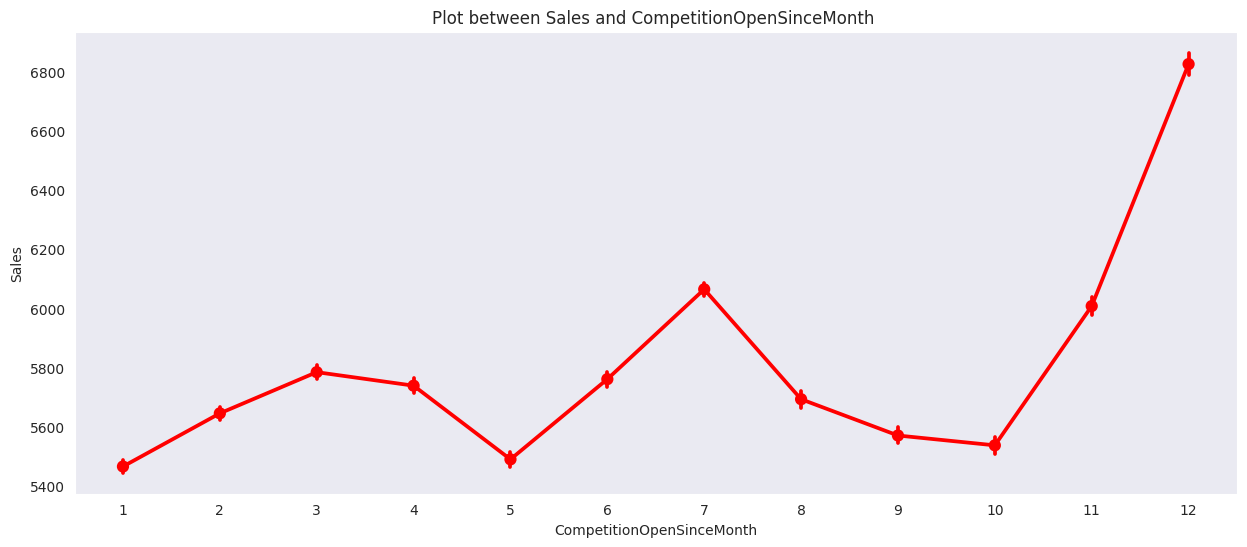

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=end1,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')




# **BOX PLOT**

Text(0.5, 1.0, 'Boxplot For Sales Values')

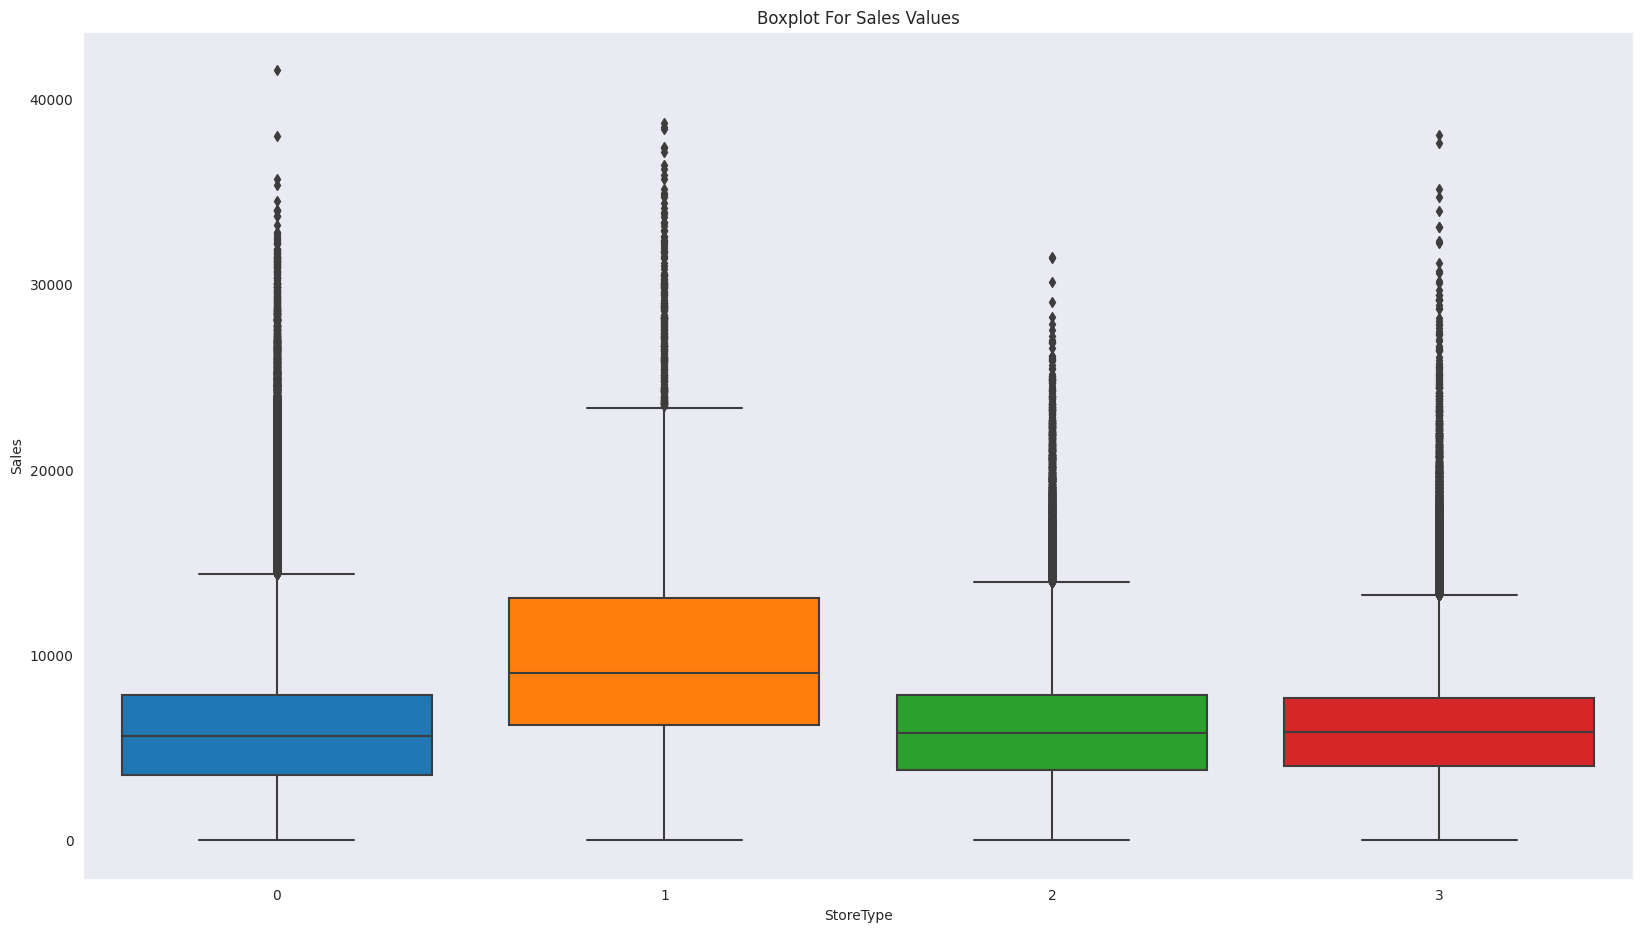

In [ ]:
plt.figure(figsize=(20,11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=end1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')


Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

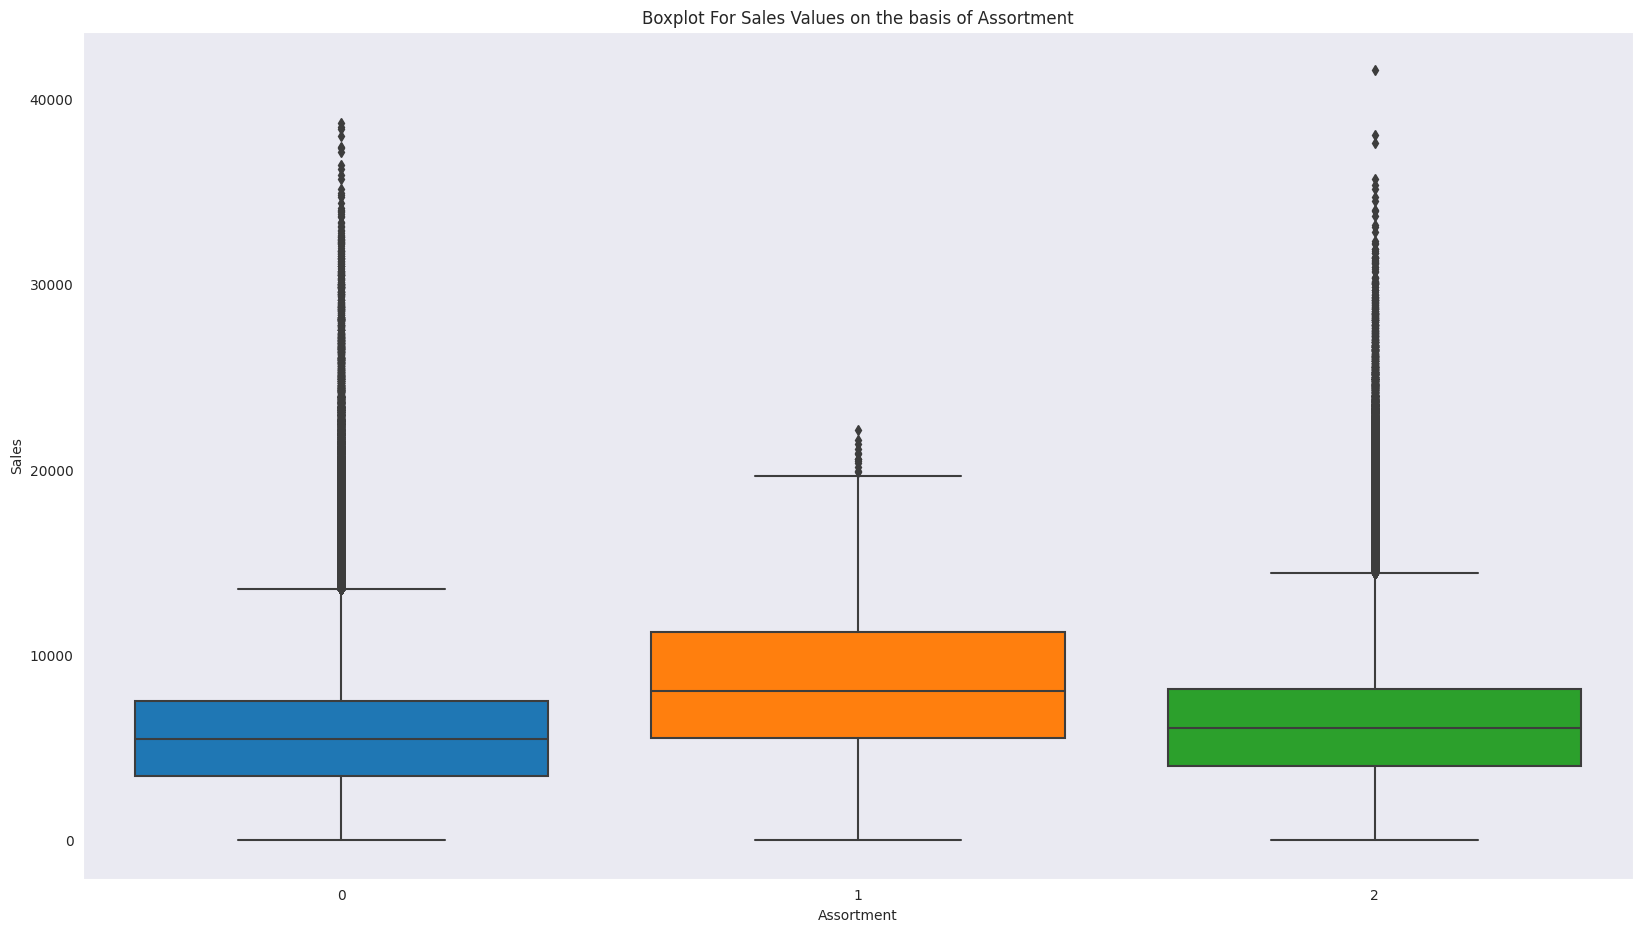

In [ ]:
plt.figure(figsize=(20,11))
plt_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=end1, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

Text(0.5, 1.0, 'Store Daily Open Countplot')

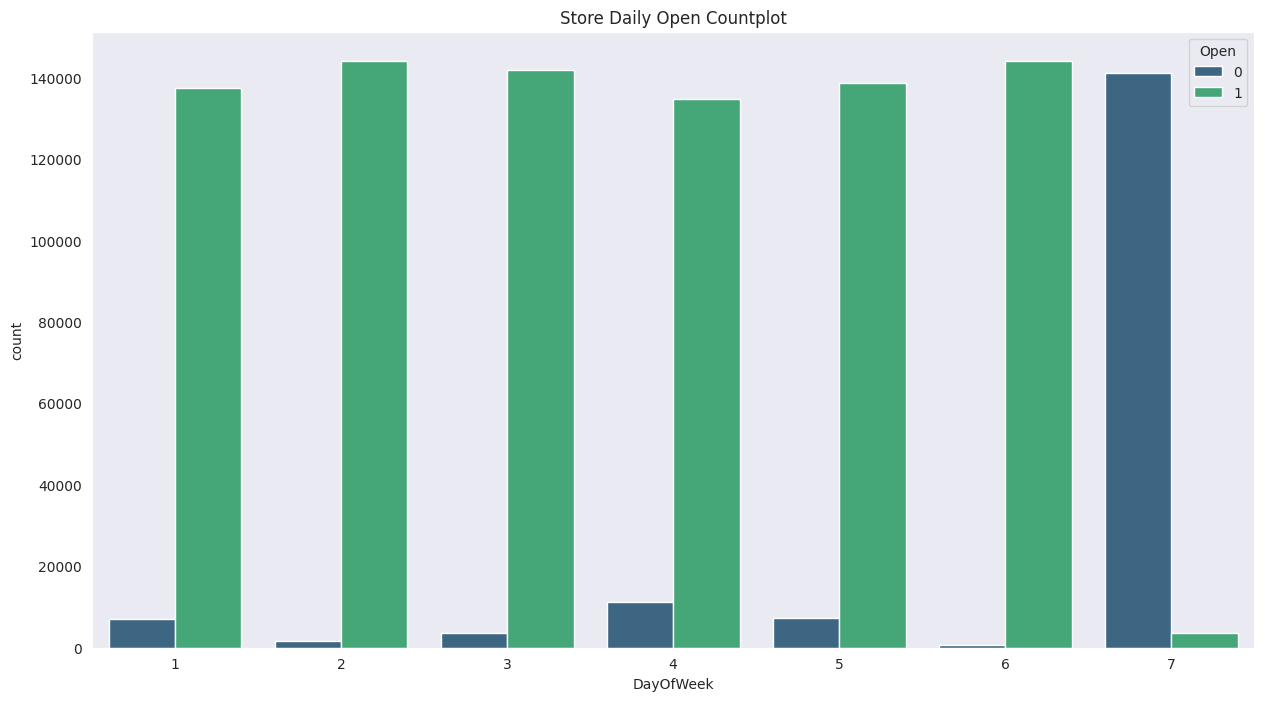

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(x= 'DayOfWeek', hue='Open', data= end1, palette='viridis')
plt.title('Store Daily Open Countplot')



Text(0.5, 1.0, 'Store Daily Promo Countplot')

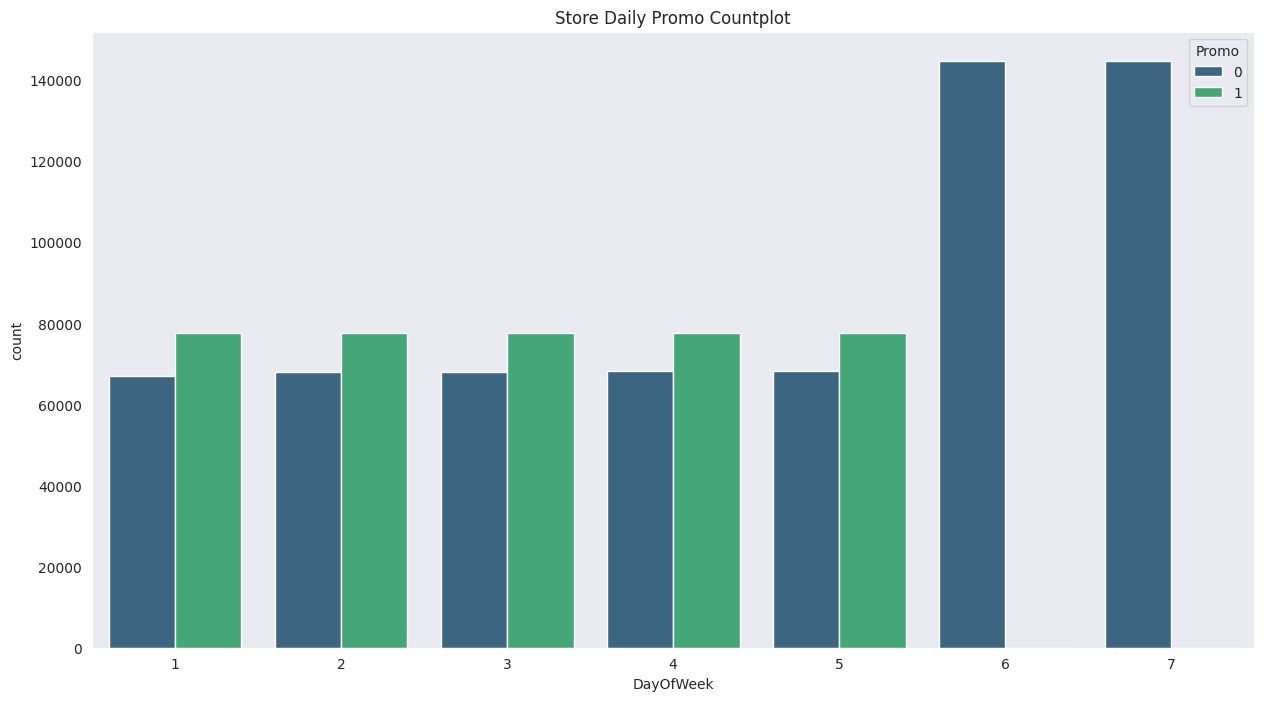

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= end1, palette='viridis')
plt.title('Store Daily Promo Countplot')


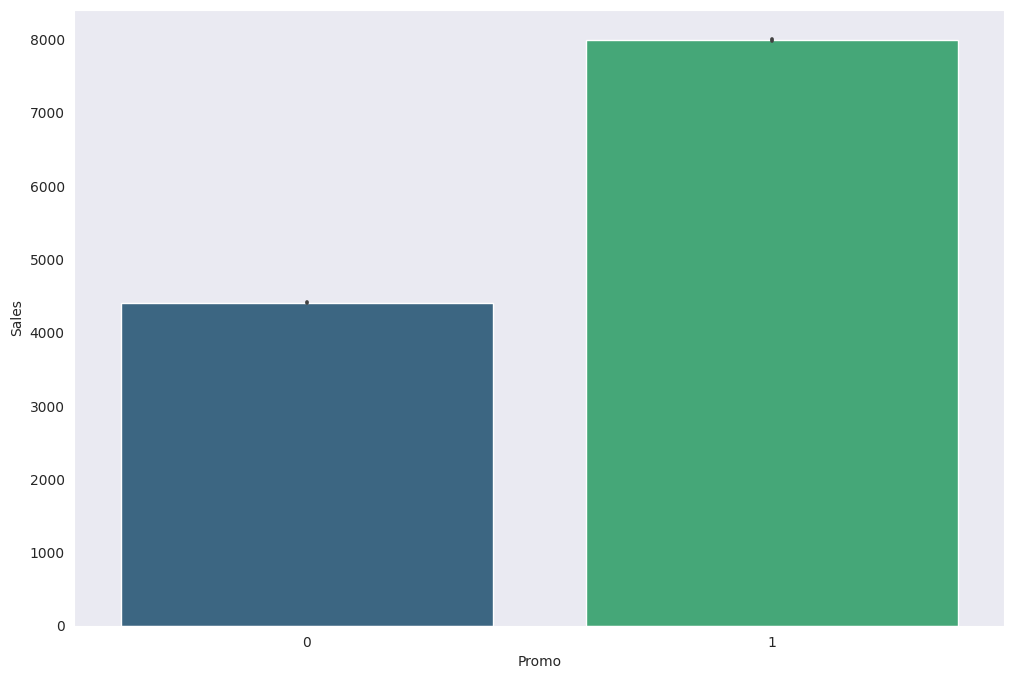

In [ ]:
plt.figure(figsize=(12, 8))
promo_sales = sns.barplot(x="Promo", y="Sales", data=end1, palette='viridis')

**"In this scenario, when we see a '0', it means a store didn't choose to run a promotion. On the other hand, when we see a '1', it indicates that a store decided to go ahead with a promotion. The stores that went for promotions generally have higher sales compared to those that didn't."**

# **School Holiday**

*0='Not Holiday', 1='Holiday'*

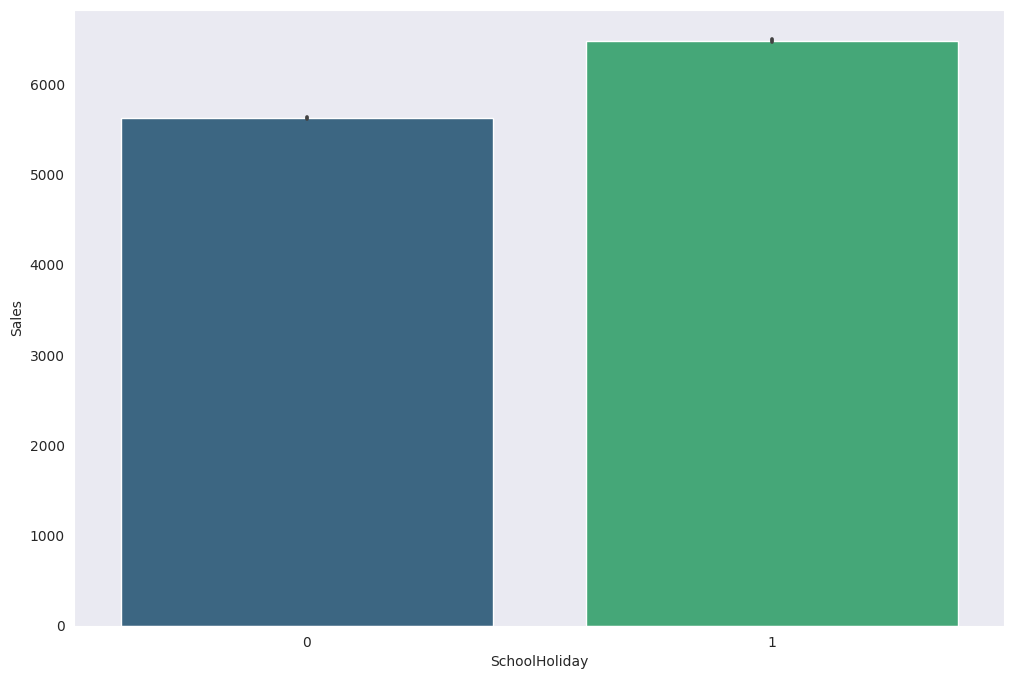

In [ ]:
plt.figure(figsize=(12, 8))
stateholiday_sales = sns.barplot(x="SchoolHoliday", y="Sales", data=end1,palette='viridis')

 **"We see that many stores are not open on State and Holidays. However, it's fascinating that more stores open during School Holidays compared to State Holidays. What's even more interesting is that the stores that opened during School Holidays had higher sales than usual."**







# **Conclusion of EDA**

a)In the plot, we can see that sales start to rise in November and reach their peak in December.

b)The plot about sales and the days of the week shows that sales are highest on Monday and then gradually decrease from Tuesday to Saturday. On Sunday, the sales almost reach zero.

c)The plot illustrating the connection between promotions and sales demonstrates that promotions contribute to boosting sales.

d)The kind of store significantly affects when stores open.

e)Stores of Type 'b' are almost always open, except for improvements or other reasons.

f)Type 'b' stores have consistently higher sales, often with higher activity on weekends.

g)Assortment Level 'b' is exclusive to Store Type 'b'.

h)Many stores are closed on State Holidays. However, it's intriguing that more stores are open during School Holidays compared to State Holidays.


















# **Feature Engineering & Data Pre-processing**

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


<Axes: >

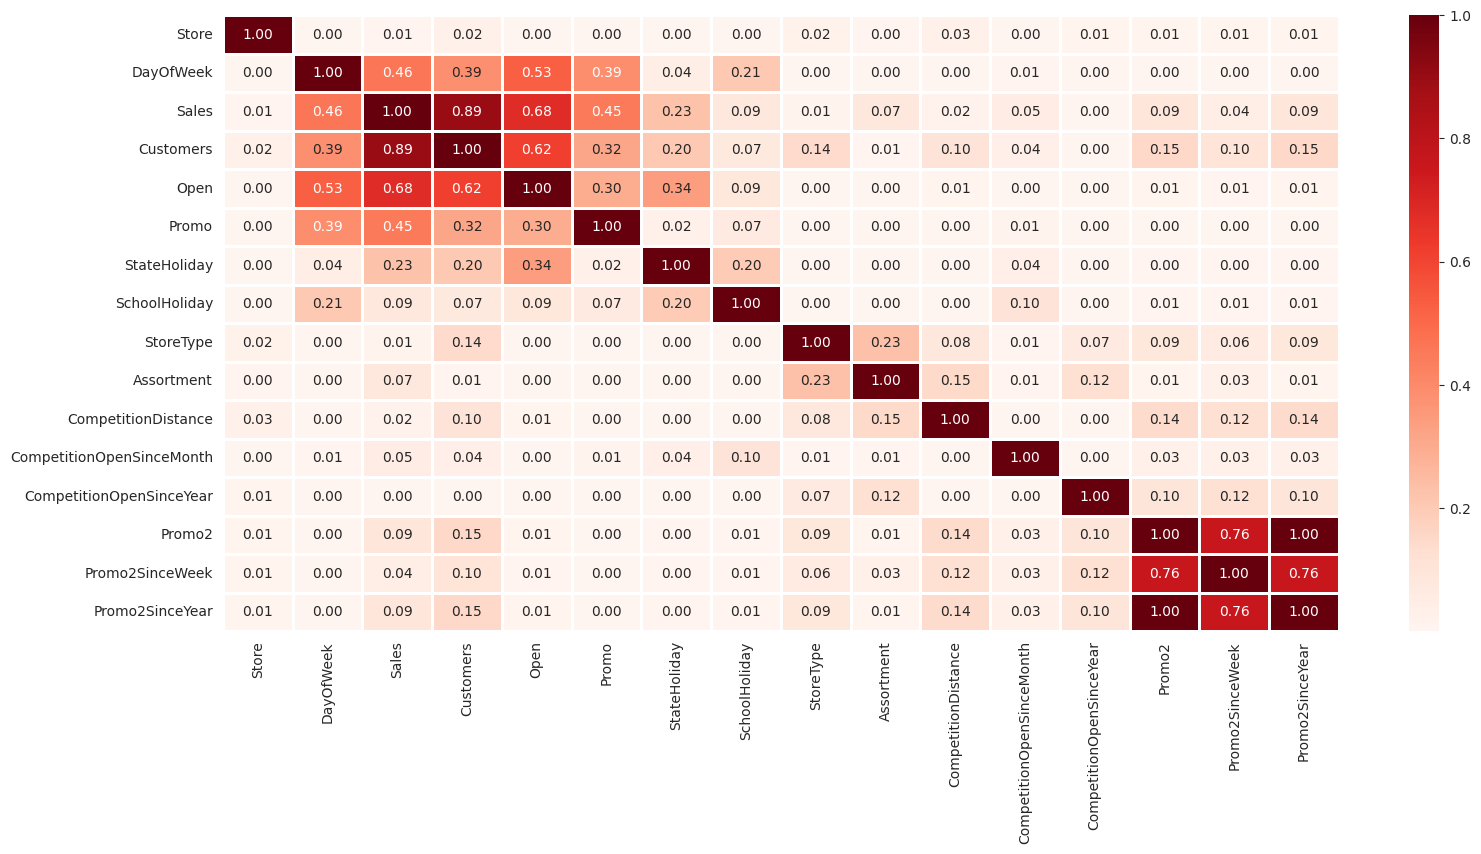

In [ ]:
plt.figure(figsize=(18,8))
correlation = end1.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")


# **Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)


In [ ]:
calc_vif(end1[[i for i in end1.describe().columns if i not in ['Sales']]])


,variables,VIF
0,Store,3.698820e+00
1,DayOfWeek,4.104634e+00
2,Customers,5.236586e+00
3,Open,9.374439e+00
4,Promo,1.917193e+00
5,StateHoliday,1.187974e+00
6,SchoolHoliday,1.330848e+00
7,StoreType,1.940267e+00
8,Assortment,2.045386e+00
9,CompetitionDistance,1.589466e+00


**Looking at the table above, we notice that the VIF (Variance Inflation Factor) values for the columns Promo2 and Promo2SinceYear are quite high. To address this, we plan to remove either the Promo2 or Promo2SinceYear column. For this analysis, we choose to drop the Promo2 column and then reevaluate the VIF values.**

In [ ]:
calc_vif(end1[[i for i in end1.describe().columns if i not in ['Sales','Promo2']]])

,variables,VIF
0,Store,3.696388
1,DayOfWeek,4.104282
2,Customers,5.236066
3,Open,9.373305
4,Promo,1.917150
5,StateHoliday,1.187974
6,SchoolHoliday,1.330831
7,StoreType,1.934410
8,Assortment,2.039789
9,CompetitionDistance,1.583028


**A VIF (Variance Inflation Factor) value less than 10 is considered favorable for a Machine Learning model..**

# **Analysis of Target Variable i.e 'Sales'.**





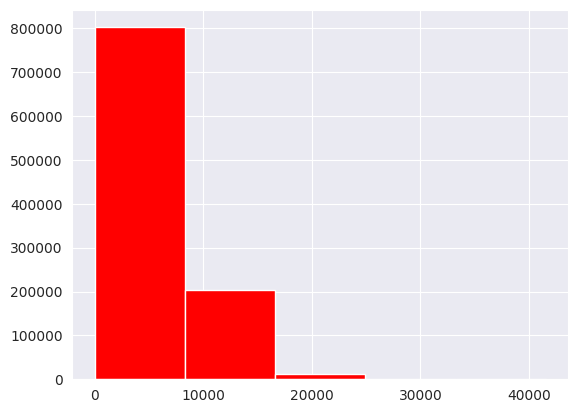

In [ ]:
pd.Series(end1['Sales'],).hist(bins=5, color="red")
plt.show()


In [ ]:
end1[(end1.Open == 0) & (end1.Sales == 0)].count()[0]

172817

**We'll remove the stores with zero sales because we assume they were temporarily closed. This will improve the accuracy of the model's training.**

In [ ]:
new_df = end1.drop(end1[(end1.Open == 0) & (end1.Sales == 0)].index)

In [ ]:
new_df.shape

(844392, 18)

In [ ]:
new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,2,0,1270,7,2008,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,0,570,7,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,0,0,14130,7,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,2,620,7,2009,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,0,29910,7,2015,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,0,150,1,2006,0,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,1,860,1,1999,0,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,1,840,1,0,1,48,2012,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,1,1430,1,0,0,0,0,0


**In the 'new_df' dataset, the column labeled 'PromoInterval' is transformed into dummies. This means that each new column will represent a binary value, either 0 or 1.**

In [ ]:
new_df = pd.get_dummies(new_df, columns=['PromoInterval'])

In [ ]:

new_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,1,1,1,...,150,1,2006,0,0,0,1,0,0,0
1016827,733,2,2013-01-01,10765,2377,1,0,1,1,1,...,860,1,1999,0,0,0,1,0,0,0
1016863,769,2,2013-01-01,5035,1248,1,0,1,1,1,...,840,1,0,1,48,2012,0,0,1,0
1017042,948,2,2013-01-01,4491,1039,1,0,1,1,1,...,1430,1,0,0,0,0,1,0,0,0


In [ ]:
new_df.to_csv('cleandata.csv', index=False)

# **5-Hypothesis Testing**
Hypothetical Statement - 1

**MODEL 1 (excluding rows which has sales =0)**

Hypothetical Statement - 2

**MODEL 2 (By taking whole Dataset)**

# ***. ML Model Implementation***

##**MODEL TRAINING**

In [ ]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

# **ML Model - 1(excluding rows which has sales =0)**

Since we're working with two datasets – one containing rows with sales equal to '0', and the other without them – we'll use both sets of data to determine the most suitable model.

**Let's start by using a dataset where we don't include rows with zero sales.**

In [ ]:
#Explaining dependent variable
dependent_variables  = 'Sales'

In [ ]:
#explaining independent variable
independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))


In [ ]:
#List of Independent Variable
independent_variables


['Store',
 'DayOfWeek',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'PromoInterval_0',
 'PromoInterval_Feb,May,Aug,Nov',
 'PromoInterval_Jan,Apr,Jul,Oct',
 'PromoInterval_Mar,Jun,Sept,Dec']

In [ ]:
# Create the data of independent variables
X = new_df[independent_variables].values

In [ ]:
#create the data of dependent variables
y = new_df[dependent_variables].values

In [ ]:
#now we are going to splitting the dataset.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675513, 18)
(168879, 18)


In [ ]:
#train the model
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
#checking the Regression Score, also known as the R-squared value.
reg.score(X_train, y_train)

0.7635183725690666

In [ ]:
# Checking the cofficient of different independent columns
reg.coef_

array([-1.61160602e-01, -6.85548194e+01,  6.35504984e+00, -6.79767354e-12,
        1.29645838e+03, -1.28102415e+03,  3.62329515e+01,  2.76744096e+02,
        2.22217335e+02,  2.88849353e-02,  2.99491278e+01,  8.39884213e-02,
       -4.31860944e+01,  1.24902145e+01,  4.31860944e+01,  3.16962854e+01,
        1.38838509e+02, -2.13720889e+02])

In [ ]:
# Checking the intercept of different indpendent columns
reg.intercept_


700.1749140828606

In [ ]:
#Predicting Dependent Variable With Test Dataset i.e 20%
y_pred = reg.predict(X_test)
y_pred

array([5324.59975349, 4849.47506442, 7238.44230268, ..., 4098.19887156,
       7772.83233987, 5368.22125565])

In [ ]:
# Original Test Dependent Value
y_test

array([ 5495,  5472,  7969, ...,  2938, 10413,  5828])

In [ ]:
#Predicting on Train Dataset
y_pred_train = reg.predict(X_train)
y_pred_train

array([5490.61068489, 6804.3787408 , 6699.04311466, ..., 7913.72781806,
       6884.64407492, 6123.05554455])

In [ ]:
# Dependent Variable With Train Dataset i.e 80 %
y_train

array([5409, 7339, 7807, ..., 4817, 6194, 5862])

In [ ]:
#Find the Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for the Test Predictions.
MSE = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2265528.631712661
RMSE : 1505.1673102059656


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.7634783399226589


In [ ]:
pd.DataFrame(zip(y_test, y_pred), columns = ['actual', 'pred'])


,actual,pred
0,5495,5324.599753
1,5472,4849.475064
2,7969,7238.442303
3,7384,6085.227240
4,13212,7829.105207
...,...,...
168874,16337,16398.115914
168875,9195,7062.744213
168876,2938,4098.198872
168877,10413,7772.832340


In [ ]:
!pip install shap

In [ ]:
pip install lime

# **SHAP and LIME**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

# load the Rossman dataset
data = pd.read_csv("/content/cleandata.csv", low_memory=False)

# convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# extract year, month, and day of week from 'Date' column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['DayOfWeek'] = data['Date'].dt.dayofweek

# select relevant features
features = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month']



# split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data['Sales'], test_size=0.2, random_state=42)

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())

# create a linear regression model
model = LinearRegression()

# train the model on the training set
model.fit(X_train, y_train)

# create a SHAP explainer object
explainer = shap.LinearExplainer(model, X_train, feature_dependence="independent")

# calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# plot the SHAP values for the first feature of the first test instance
shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

# create a LIME explainer object
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['Sales'], mode='regression')

# explain the prediction for the first test instance using LIME
exp = explainer.explain_instance(X_test.values[0], model.predict, num_features=4)

# print the LIME explanation
print(exp.as_list())




# **LASSO**

In [ ]:
from sklearn.model_selection import cross_val_score
L1 = Lasso(alpha = 0.4, max_iter=10000,selection='cyclic', tol=0.0001,)

In [ ]:
L1.fit(X_train, y_train)

Lasso(alpha=0.4, max_iter=10000)

In [ ]:
y_pred_lasso = L1.predict(X_test)


In [ ]:
L1.score(X_test, y_test)

0.7634691535325336

In [ ]:
cv_scores = cross_val_score(L1, X, y, cv=10)
mean_cv_score = cv_scores.mean()

In [ ]:
cv_scores

array([0.73075467, 0.74886334, 0.760761  , 0.75799899, 0.75829695,
       0.76481454, 0.76725115, 0.75273622, 0.7581241 , 0.78478933])

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
#Specify the range of alpha values to try out.
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

In [ ]:
mean_cv_score

0.7584390301539468

In [ ]:
# perform grid search to find the best alpha value
lasso_cv = GridSearchCV(L1, parameters, cv=5)
lasso_cv.fit(X, y)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.4, max_iter=10000),
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]})

In [ ]:
#Find the best alpha value and its corresponding score.
best_alpha_lasso = lasso_cv.best_params_['alpha']
best_score_lasso= lasso_cv.best_score_

In [ ]:
best_alpha_lasso

0.2

In [ ]:
best_score_lasso

0.7605720937492583

In [ ]:
pd.DataFrame(zip(y_test, y_pred_lasso), columns = ['actual', 'pred'])

,actual,pred
0,5495,5326.691753
1,5472,4855.673283
2,7969,7238.384055
3,7384,6081.070695
4,13212,7828.210761
...,...,...
168874,16337,16396.316028
168875,9195,7062.612459
168876,2938,4103.045275
168877,10413,7775.470708


# **Ridge**


In [ ]:
L2 = Ridge(alpha = 0.5)

In [ ]:
L2.fit(X_train, y_train)

Ridge(alpha=0.5)

In [ ]:
L2.predict(X_test)

array([5324.60052372, 4849.47909241, 7238.44267842, ..., 4098.20177963,
       7772.83051021, 5368.22254699])

In [ ]:
L2.score(X_test, y_test)


0.7634783364876163

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, cross_val_score

ridge = Ridge(max_iter=10000, solver='auto')

# define the range of alpha values to test
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5]}

# perform grid search to find the best alpha value
ridge_cv = GridSearchCV(L2, parameters, cv=5)
ridge_cv.fit(X, y)

# extract the best alpha value and corresponding score
best_alpha = ridge_cv.best_params_['alpha']
best_score = ridge_cv.best_score_

# perform cross-validation with the best alpha value
ridge_best = Ridge(alpha=best_alpha, max_iter=10000, solver='auto')
cv_scores = cross_val_score(ridge_best, X, y, cv=5)

# find the maximum score and corresponding alpha value
max_score = cv_scores.max()
max_alpha = best_alpha

print("Best alpha value: ", best_alpha)
print("Best score: ", best_score)
print("Maximum CV score: ", max_score)
print("Corresponding alpha value: ", max_alpha)



Best alpha value:  0.5
Best score:  0.7605702635648154
Maximum CV score:  0.7700304608182428
Corresponding alpha value:  0.5


# **Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# define the Elastic Net model
elastic_net = ElasticNet(max_iter=10000)

#Explain the range of values for alpha and l1_ratio
parameters = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]}

#perform grid search to find the best alpha and l1_ratio values
elastic_net_cv = GridSearchCV(elastic_net, parameters, cv=5)
elastic_net_cv.fit(X_train, y_train)

# extract the best alpha and l1_ratio values and corresponding score
best_alpha = elastic_net_cv.best_params_['alpha']
best_l1_ratio = elastic_net_cv.best_params_['l1_ratio']
best_score = elastic_net_cv.best_score_

# create an Elastic Net model with the best hyperparameters
elastic_net_best = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=10000)
elastic_net_best.fit(X_train, y_train)

# evaluate the model on the testing set
test_score = elastic_net_best.score(X_test, y_test)

print("Best alpha value: ", best_alpha)
print("Best l1_ratio value: ", best_l1_ratio)
print("Best score: ", best_score)
print("Test score: ", test_score)

Best alpha value:  0.1
Best l1_ratio value:  0.9
Best score:  0.7631623015682307
Test score:  0.7631533468498847


# **Decision Tree**

In [ ]:
sales_mean=end1[dependent_variables].mean()

In [ ]:
sales_mean


5773.818972305593

In [ ]:
sales_mean_new=new_df[dependent_variables].mean()

In [ ]:
sales_mean_new

6955.514290755952

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_new
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 2006697.3608355538
RMSE : 1416.5794580028166
RMPSE : 0.2036627916767399
R2 : 0.7905003784044686


# **MODEL 2 (By taking whole Dataset)**


**In the end1 dataset, the 'PromoInterval' column is transformed into dummies. This means that for each new column, there will be a simple yes (1) or no (0) value.**

In [ ]:
end1 = pd.get_dummies(end1, columns=['PromoInterval'])

In [ ]:
end1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0


**We set up the factors that influence something (dependent variables) and the factors that drive them (independent variables), and then we turn them into arrays**

In [ ]:
# defining dependent variable
dep_var = 'Sales'

# defining independent variable
indep_var = end1.columns.drop(['Store', 'Promo2SinceYear','Date','Sales'])

In [ ]:
indep_var


Index(['DayOfWeek', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'PromoInterval_0', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [ ]:
# Create the data of independent variables
U = end1[indep_var].values
# Create the dependent variable data
V = end1[dep_var].values


In [ ]:
V

array([5263, 6064, 8314, ...,    0,    0,    0])

In [ ]:
U

array([[  5, 555,   1, ...,   0,   0,   0],
       [  5, 625,   1, ...,   0,   1,   0],
       [  5, 821,   1, ...,   0,   1,   0],
       ...,
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  2,   0,   0, ...,   0,   0,   1]])

In [ ]:
end1[indep_var]

,DayOfWeek,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,5,555,1,1,0,1,2,0,1270,7,2008,0,0,1,0,0,0
1,5,625,1,1,0,1,0,0,570,7,2007,1,13,0,0,1,0
2,5,821,1,1,0,1,0,0,14130,7,2006,1,14,0,0,1,0
3,5,1498,1,1,0,1,2,2,620,7,2009,0,0,1,0,0,0
4,5,559,1,1,0,1,0,0,29910,7,2015,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,2,0,0,0,1,1,0,0,1900,1,2014,1,31,0,0,1,0
1017205,2,0,0,0,1,1,2,2,1880,1,2006,0,0,1,0,0,0
1017206,2,0,0,0,1,1,0,2,9260,1,0,0,0,1,0,0,0
1017207,2,0,0,0,1,1,0,2,870,1,0,0,0,1,0,0,0


In [ ]:
# splitting the dataset
U_train, U_test, v_train, v_test = train_test_split(U, V, test_size=0.2, random_state = 0)
print(U_train.shape)
print(U_test.shape)

(813767, 17)
(203442, 17)


# **LINEAR REGRESSION**

In [ ]:
# scling the x values
scaler=StandardScaler()

U_train = scaler.fit_transform(U_train)
U_test = scaler.transform(U_test)



In [ ]:
# fitting the data into Lineat Regression Model
linear_regression = LinearRegression()
linear_regression.fit(U_train, v_train)


LinearRegression()

In [ ]:
v_pred=linear_regression.predict(U_test)
v_pred

array([ 7096.84377024, 12610.58107493,  9196.39650461, ...,
        6937.35451243,  5999.27248118,  4001.77150461])

In [ ]:
linear_regression.score(U_train, v_train)

0.8677980768294753

In [ ]:
regression_Dataframe = pd.DataFrame(zip(v_test, v_pred), columns = ['actual', 'pred'])
regression_Dataframe


,actual,pred
0,7285,7096.843770
1,6221,12610.581075
2,8132,9196.396505
3,20916,11530.977559
4,5472,6598.566426
...,...,...
203437,5650,6659.144551
203438,5464,6523.884786
203439,6191,6937.354512
203440,5663,5999.272481


In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(v_test, v_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred)
print("R2 :" ,r2)

MSE : 1944256.204574886
RMSE : 1394.3658790198813
RMPSE : 0.2414980250866932
R2 : 0.8684245187618315


# **DECISION TREE**

In [ ]:
decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(U_train, v_train)
v_pred_dt = decision_tree.predict(U_test)
v_train_dt = decision_tree.predict(U_train)
#print('dt_regressor R^2: ', r2(v_test,v_pred))
MSE  = mean_squared_error(v_test, v_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(v_test, v_pred_dt)
print("R2 :" ,r2)

MSE : 1938797.0529188653
RMSE : 1392.4069279197317
RMPSE : 0.24115874338951052
R2 : 0.8687939610732938


In [ ]:
decisiontree_Dataframe = pd.DataFrame(zip(v_test, v_pred_dt), columns = ['actual', 'pred'])
decisiontree_Dataframe


,actual,pred
0,7285,6405.437098
1,6221,10731.775506
2,8132,9096.411096
3,20916,11835.110635
4,5472,5476.684725
...,...,...
203437,5650,5476.684725
203438,5464,5476.684725
203439,6191,8169.463222
203440,5663,6405.437098


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make a random forest model for prediction. Use 500 trees, limit each tree's depth to 8 levels, and use 2 processors to speed things up
random_forest = RandomForestRegressor(n_estimators=500, max_depth=8, n_jobs=2)

# Train the random forest model using the training data.
random_forest.fit(U_train, v_train)

# Make predictions on the test data
v_pred_rf = random_forest.predict(U_test)

#Find the average of the squared differences between the predicted and actual values.

MSE = mean_squared_error(v_test, v_pred_rf)
print("MSE:", MSE)

# Calculate the root mean squared error (RMSE)
RMSE = np.sqrt(MSE)
print("RMSE:", RMSE)

# Calculate the root mean squared percentage error (RMPSE)
sales_mean = np.mean(v_test)
RMPSE = RMSE / sales_mean
print("RMPSE:", RMPSE)

# Calculate the coefficient of determination (R2 score)
r2 = r2_score(v_test, v_pred_rf)
print("R2:", r2)


MSE: 1121319.9356948503
RMSE: 1058.9239517995852
RMPSE: 0.18324845298657572
R2: 0.9241158599294471


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(n_estimators=500, learning_rate=0.01)
adaboost.fit(U_train, v_train)
v_pred_ada = adaboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_ada)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_ada)
print("R2 :", r2)

MSE : 2295472.8002061206
RMSE : 1515.081780038992
RMPSE : 0.2621872815970064
R2 : 0.8446563073088994


In [ ]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(n_estimators=500, max_depth=8, n_jobs=2)
xgboost.fit(U_train, v_train)
v_pred_xgb = xgboost.predict(U_test)

MSE = mean_squared_error(v_test, v_pred_xgb)
print("MSE :", MSE)

RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

RMPSE = RMSE/sales_mean
print("RMPSE :", RMPSE)

r2 = r2_score(v_test, v_pred_xgb)
print("R2 :", r2)

MSE : 177545.44218920538
RMSE : 421.3614151642333
RMPSE : 0.07291725467712691
R2 : 0.9879848000779321


### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Write the conclusion here.**

1.We found that there were 172,817 rows with zero sales in the Sales column. To improve our model, we made a new dataset by excluding these zero sales rows. Using various techniques, we trained the model and achieved around 74% accuracy.

2.We were interested in the entire dataset, even the rows with zero sales. So, we trained another model using different methods and achieved an accuracy of about 98%, which is much better than the previous model.

3.This led us to conclude that removing rows with zero sales actually removes a lot of valuable information from the dataset, as it comprises a significant number of rows (172,817). Therefore, we decided to keep those values. Our best Root Mean Squared Percentage Error (RMPSE) score came from the Random Forest model and Gradient Boosting techniques like AdaBoost and XGBoost. We took care to choose optimal parameters to prevent overfitting in our model.







### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***